In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  

In [63]:
data = pd.read_csv("Datasets/Mount_Everest_Climbing_Deaths/data.csv")
data.head()

,No.,Name,Date,Age,Expedition,Nationality,Cause of death,Location
0,1,Dorje,"June 7, 1922",NaN,1922 British Mount Everest Expedition,Nepal,Avalanche,Below North Col
1,2,Lhakpa,"June 7, 1922",NaN,1922 British Mount Everest Expedition,Nepal,Avalanche,Below North Col
2,3,Norbu,"June 7, 1922",NaN,1922 British Mount Everest Expedition,Nepal,Avalanche,Below North Col
3,4,Pasang,"June 7, 1922",NaN,1922 British Mount Everest Expedition,Nepal,Avalanche,Below North Col
4,5,Pema,"June 7, 1922",NaN,1922 British Mount Everest Expedition,Nepal,Avalanche,Below North Col


In [64]:
data.shape

(310, 8)

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   No.             310 non-null    int64  
 1   Name            310 non-null    object 
 2   Date            310 non-null    object 
 3   Age             160 non-null    float64
 4   Expedition      271 non-null    object 
 5   Nationality     309 non-null    object 
 6   Cause of death  296 non-null    object 
 7   Location        291 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 19.5+ KB


In [66]:
num_categories = [feature for feature in data.columns if data[feature].dtype != "O"]
data[num_categories].isnull().sum()

No.      0
Age    150
dtype: int64

# Percentage of Misssing Values

In [67]:
df=pd.read_csv('Datasets/Mount_Everest_Climbing_Deaths/data.csv',usecols=['Age','Cause of death','Location'])
df.head()
df.isnull().mean()

Age               0.483871
Cause of death    0.045161
Location          0.061290
dtype: float64

In [68]:
data["Age"].describe()

count    160.000000
mean      40.356250
std       12.244545
min       19.000000
25%       31.750000
50%       38.000000
75%       48.000000
max       85.000000
Name: Age, dtype: float64

In [69]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [70]:
median = df.Age.median()

In [71]:
impute_nan(df, "Age", median)

In [72]:
df.head()

,Age,Cause of death,Location,Age_median,Age_random
0,NaN,Avalanche,Below North Col,38.0,45.0
1,NaN,Avalanche,Below North Col,38.0,22.0
2,NaN,Avalanche,Below North Col,38.0,63.0
3,NaN,Avalanche,Below North Col,38.0,48.0
4,NaN,Avalanche,Below North Col,38.0,41.0


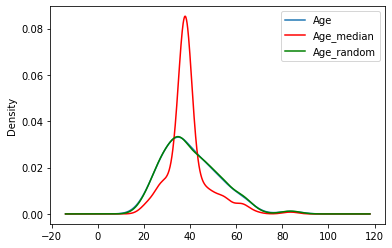

In [73]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
df.Age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [74]:
def impute_nann(df,variable):
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),'Age']=random_sample

impute_nann(data, "Age")

In [75]:
cat_categories = [feature for feature in data.columns if data[feature].dtype == "O"]
data[cat_categories].isnull().sum()

Name               0
Date               0
Expedition        39
Nationality        1
Cause of death    14
Location          19
dtype: int64

In [76]:
data[cat_categories] = data[cat_categories].fillna("unknown values")
data.head()

,No.,Name,Date,Age,Expedition,Nationality,Cause of death,Location
0,1,Dorje,"June 7, 1922",45.0,1922 British Mount Everest Expedition,Nepal,Avalanche,Below North Col
1,2,Lhakpa,"June 7, 1922",22.0,1922 British Mount Everest Expedition,Nepal,Avalanche,Below North Col
2,3,Norbu,"June 7, 1922",63.0,1922 British Mount Everest Expedition,Nepal,Avalanche,Below North Col
3,4,Pasang,"June 7, 1922",48.0,1922 British Mount Everest Expedition,Nepal,Avalanche,Below North Col
4,5,Pema,"June 7, 1922",41.0,1922 British Mount Everest Expedition,Nepal,Avalanche,Below North Col


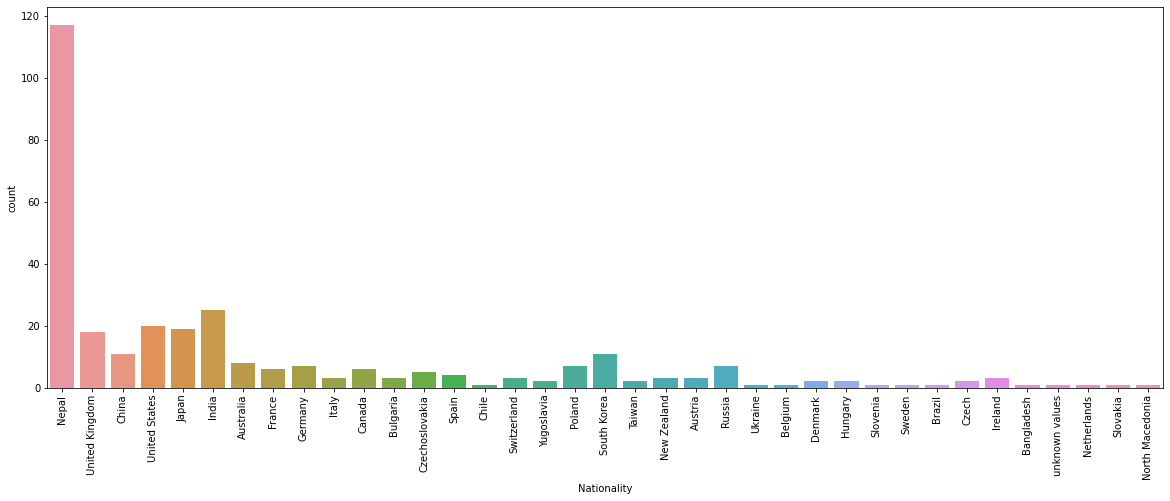

In [77]:
plt.figure(figsize=(20,7))
sns.countplot(x="Nationality", data=data)
plt.xticks(rotation=90)
plt.show()

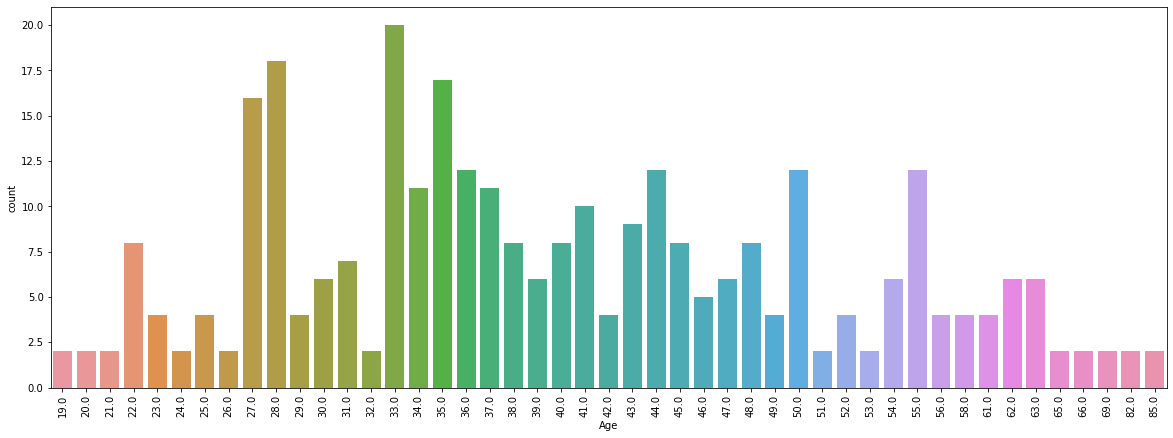

In [78]:
plt.figure(figsize=(20,7))
sns.countplot(x="Age", data=data)
plt.xticks(rotation=90)
plt.show()

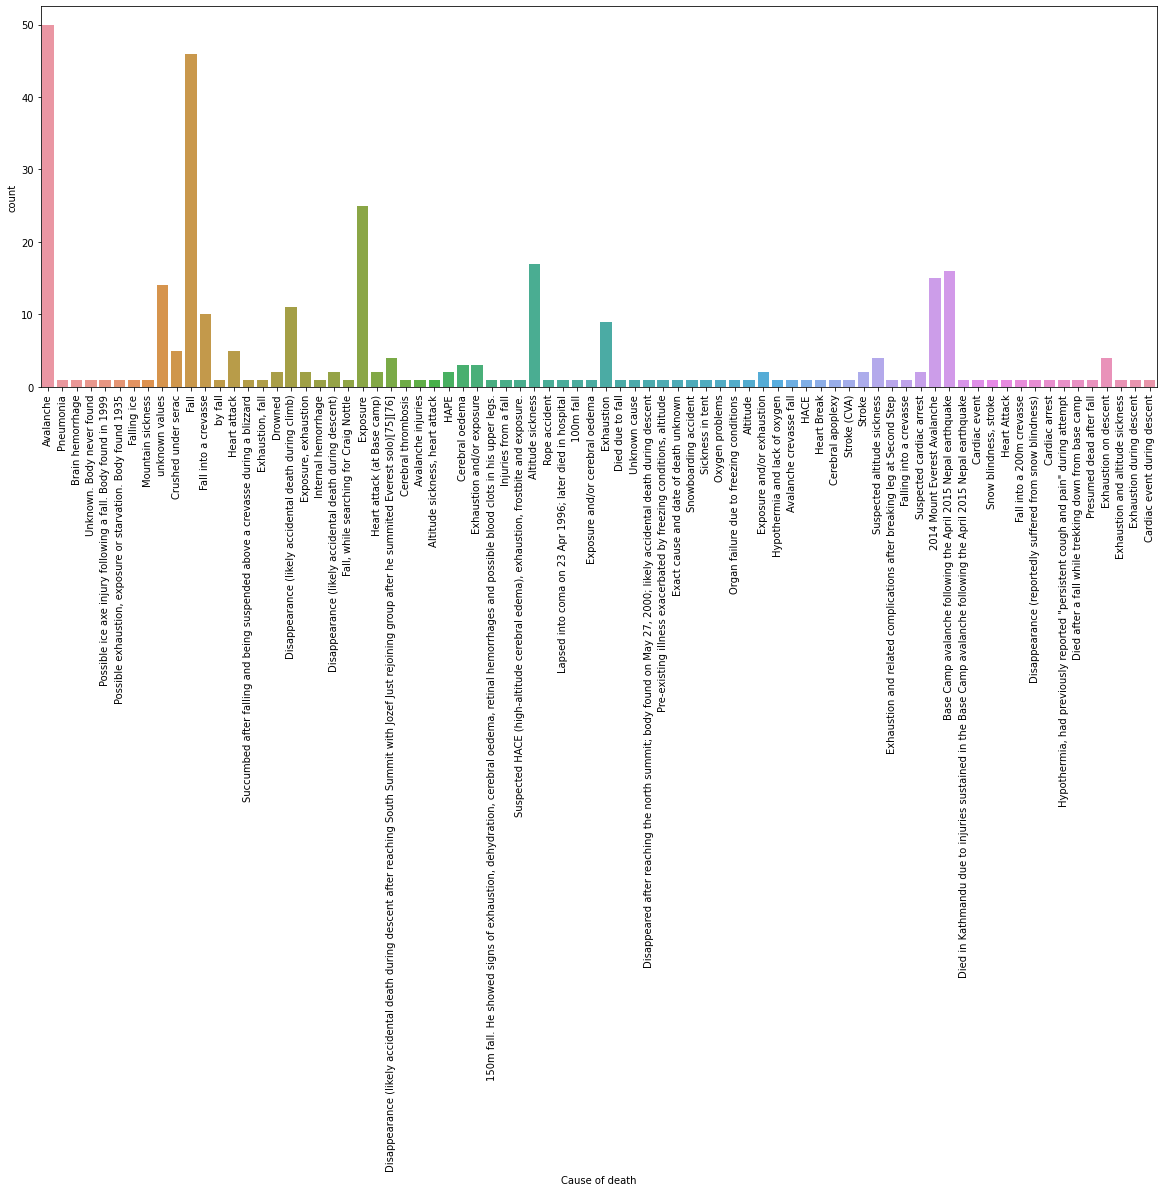

In [80]:
plt.figure(figsize=(20,7))
sns.countplot(x="Cause of death", data=data)
plt.xticks(rotation=90)
plt.show()

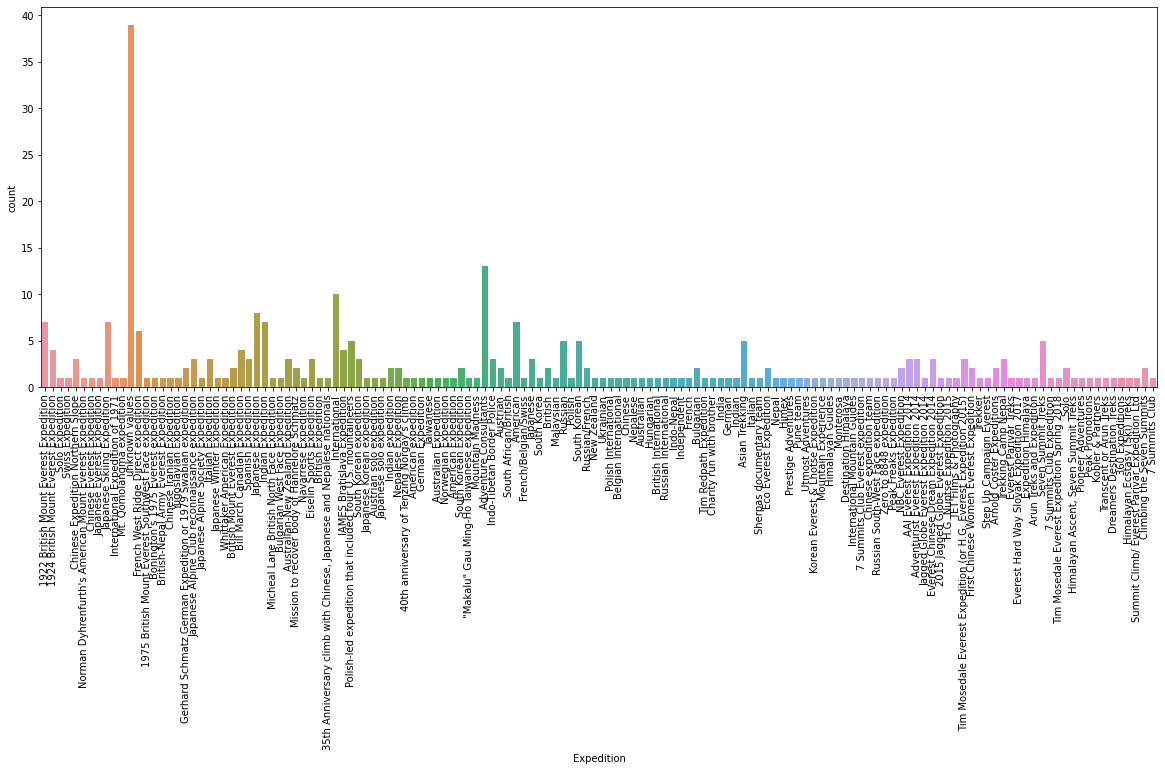

In [81]:
plt.figure(figsize=(20,7))
sns.countplot(x="Expedition", data=data)
plt.xticks(rotation=90)
plt.show()